## `MeshArray`'s represent global gridded variables

Each `MeshArray` contains an array of elementary arrays that (1) are connected at their edges and (2) collectively form a global grid. Global grid specifications are contained within `gcmgrid` instances.

#### First, let's load the `MeshArrays` & `Plots` packages

In [1]:
using MeshArrays, Plots

p=dirname(pathof(MeshArrays))
include(joinpath(p,"../examples/Plots.jl"))

┌ Info: Precompiling MeshArrays [cb8c808f-1acf-59a3-9d2b-6e38d009f683]
└ @ Base loading.jl:1273


Plots.contour

#### Select a pre-defined grid such as `LLC90` grid commonly used with `MITgcm`

In [2]:
mygrid=GridSpec("LatLonCap","../inputs/GRID_LLC90/")

gcmgrid("../inputs/GRID_LLC90/", "LatLonCap", 5, Tuple{Int64,Int64}[(90, 270), (90, 270), (90, 90), (270, 90), (270, 90)], [90 1170], Float64, read, write)

And download the pre-defined grid if needed

In [3]:
if !isdir("../inputs/GRID_LLC90")
    run(`git clone https://github.com/gaelforget/GRID_LLC90 ../inputs/GRID_LLC90`)
end

#### Read a MeshArray from file

Read a global field from binary file and convert it to `MeshArrays`'s `gcmfaces` type

In [4]:
D=mygrid.read(mygrid.path*"Depth.data",MeshArray(mygrid,Float64))
show(D)

 gcmarray 
  grid type   = LatLonCap
  data type   = Float64
  tile array  = (5,)
  tile sizes  = (90, 270)
                (90, 270)
                (90, 90)
                (270, 90)
                (270, 90)


Plot the subdomain arrays

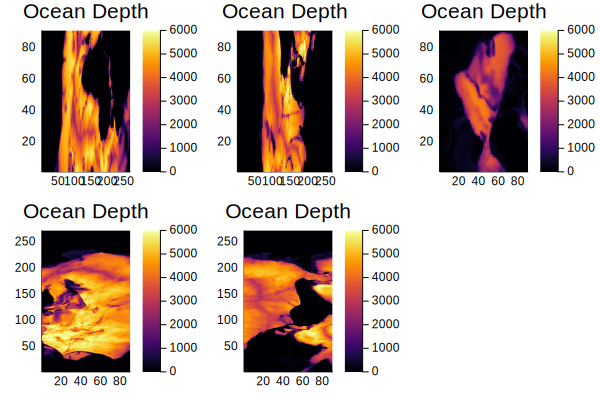

In [5]:
heatmap(D,title="Ocean Depth",clims=(0.,6000.))

The read / write functions can also be used to convert a MeshArray from / to Array

In [6]:
tmp1=write(D)
tmp2=read(tmp1,D)

5-element MeshArrays.gcmarray{Float64,1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

#### MeshArrays should behave just like Arrays

Here are a few examples that would be coded similarly in both cases

In [7]:
size(D)
eltype(D)
view(D,:)

D .* 1.0
D .* D
1000*D
D*1000

D[findall(D .> 300.)] .= NaN
D[findall(D .< 1.)] .= NaN

D[1]=0.0 .+ D[1]
tmp=cos.(D)

5-element MeshArrays.gcmarray{Float64,1}:
 [NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; NaN NaN … NaN NaN]
 [NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; NaN NaN … NaN NaN]
 [NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; NaN NaN … NaN NaN]
 [NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; NaN NaN … NaN NaN]
 [NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; NaN NaN … NaN NaN]